# LOAD DATASET

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


From the result above,
*   There are 53,940 lines (records or the number of observations) in the dataset.
*   There are 10 columns, namely: Carat, Cut, Color, Clarity, Depth, Table, Price, X, Y, Z. These columns are variables in our data.

In [3]:
# Checking the data types of each columns
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Variable description
Based on information from Kaggle, the variables in Diamond Dataset are as follows:

* The price in the United States dollar ($) is a target feature.
* Carat: represents weight (weight) of diamonds (0.2-5.01), used as a measure of gems and jewelry.
* Cut: represents the quality of Diamonds cutting (Fair, Good, Very Good, Premium, and Ideal).
* Color: represents color, from J (the worst) to D (the best).
* Clarity: represents how clear diamonds (i1 (worst), si2, si1, vs2, vs1, vvs2, vvs1, if (best))
* X: represents the length of diamonds in mm (0-10.74).
* Y: represents the width of Diamonds in MM (0-58.9).
* Z: represents the depth of diamonds in mm (0-31.8).
* Depth: represents Z/Mean (x, y) = 2 * z/(x + y) (43-79).
* Table: represent the upper width of the diamond relative to the widest point 43-95).

The following is an illustration of features x, y, z, depth, and table:
![iamonds features](https://drive.google.com/uc?export=view&id=1CHDHRRfg3Gh9g22Vqs-0asVv5jB9bdfM)

# Exploratory Data Analysis

## Handling Missing Value

In [4]:
# Check the summary statistics of a diamond dataframe
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


From the results of the describe () function, the minimum value for columns x, y, and z is 0. As we know, x, y, and z are lengths, widths, and depths of diamonds so there is no way there are diamonds with dimensions x, y, or z = 0. We suspect that this is invalid data or is often called a missing value. Let's check how many missing values are in columns X, Y, and Z.

In [5]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()
 
print("Total numbers of 0 value in x column: ", x)
print("Total numbers of 0 value in x column: ", y)
print("Total numbers of 0 value in x column: ", z)

Total numbers of 0 value in x column:  8
Total numbers of 0 value in x column:  7
Total numbers of 0 value in x column:  20


Furthermore, let's check, are data with value=0 on one dimension also found in other dimensions? We will check from column Z which has the most missing value.

In [6]:
diamonds.loc[(diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Apparently, all data worth 0 in dimensions X and Y also has a value of 0 in the Z dimension. Now, we need to decide what we will do with this lost data. There are several techniques to overcome the missing value, among others, to delete or drop the lost data, replace it with the mean or median, and predict and replace the value with the regression technique.

Each technique certainly has advantages and disadvantages. In addition, the handling of missing values is also unique depending on the case. In our case, 20 samples of missing values are small amounts when compared to the total number of samples of 53,940. If the 20 samples are deleted, of course, we will lose some information. However, this is not a problem because we still have 53,920 other samples. So, let's just delete these missing values.

In [7]:
# Drop raw with 'x', 'y', dan 'z' = 0
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]
 
# Check data size te ensure the data has been dropped
diamonds.shape

(53920, 10)

## Handling Outliers

Let's find out if our data has outliers!

<AxesSubplot:xlabel='carat'>

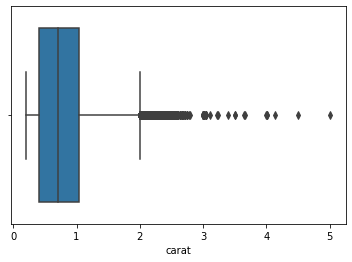

In [8]:
sns.boxplot(x=diamonds['carat'])

<AxesSubplot:xlabel='table'>

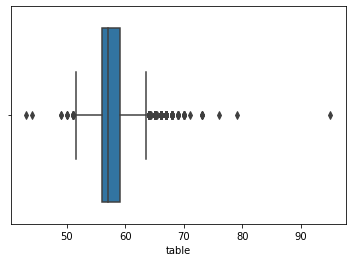

In [9]:
sns.boxplot(x=diamonds['table'])

<AxesSubplot:xlabel='x'>

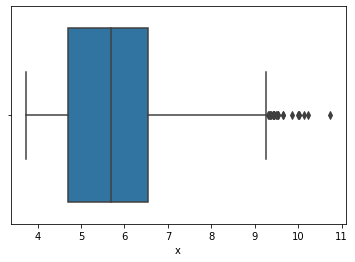

In [10]:
sns.boxplot(x=diamonds['x'])

We can see above that our data has outliers. 

We will remove the outliers using IQR methods. IQR stands for Inter Quartile Range. The quartile of a population is three values that divide the distribution of data into four distributions. A quarter of the data is under the first quartile (Q1), half of the data is below the second quartile (Q2), and three-quarters of the data are in the third quartile (Q3). Thus the Interquartile Range or IQR = Q3 - Q1. 

Let's implement this to our code!

In [11]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR=Q3-Q1
diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]
 
# Check dataset size after we dropped the outlier
diamonds.shape

<ipython-input-11-122f0771611d>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]


(47524, 10)

After removing outliers, our dataset now have 47524 samples.

## Univariate Analysis

Let's continue to the process of Exploratory Data Analysis (EDA). We will first focus on Univariate analysis.

To make it easy, divide the features on the dataset into two parts, numeric features, and category features.

In [12]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

### Categorical Features

Let's take a look at our categorical features

           number of samples  persentage
Ideal                  20340        42.8
Premium                12115        25.5
Very Good              10994        23.1
Good                    3745         7.9
Fair                     330         0.7


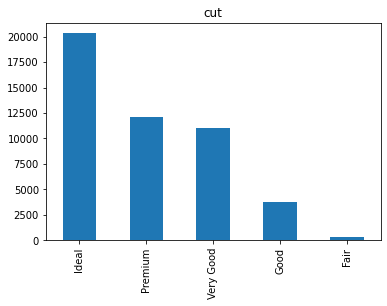

In [13]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'number of samples':count, 'persentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   number of samples  persentage
G              10081        21.2
E               8910        18.7
F               8466        17.8
H               7176        15.1
D               6195        13.0
I               4462         9.4
J               2234         4.7


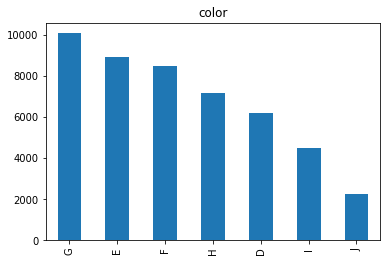

In [14]:
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'number of samples':count, 'persentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

      number of sample  persentagee
SI1              11552         24.3
VS2              10928         23.0
SI2               7402         15.6
VS1               7373         15.5
VVS2              4683          9.9
VVS1              3463          7.3
IF                1650          3.5
I1                 473          1.0


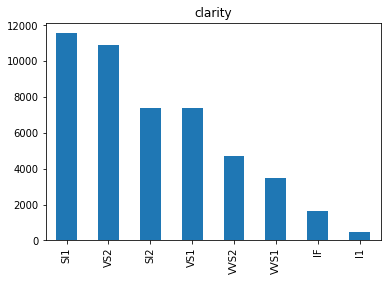

In [15]:
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'number of sample':count, 'persentagee':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Numerical Features

Let's take a look at the numerical features and plot the histogram of the numerical features

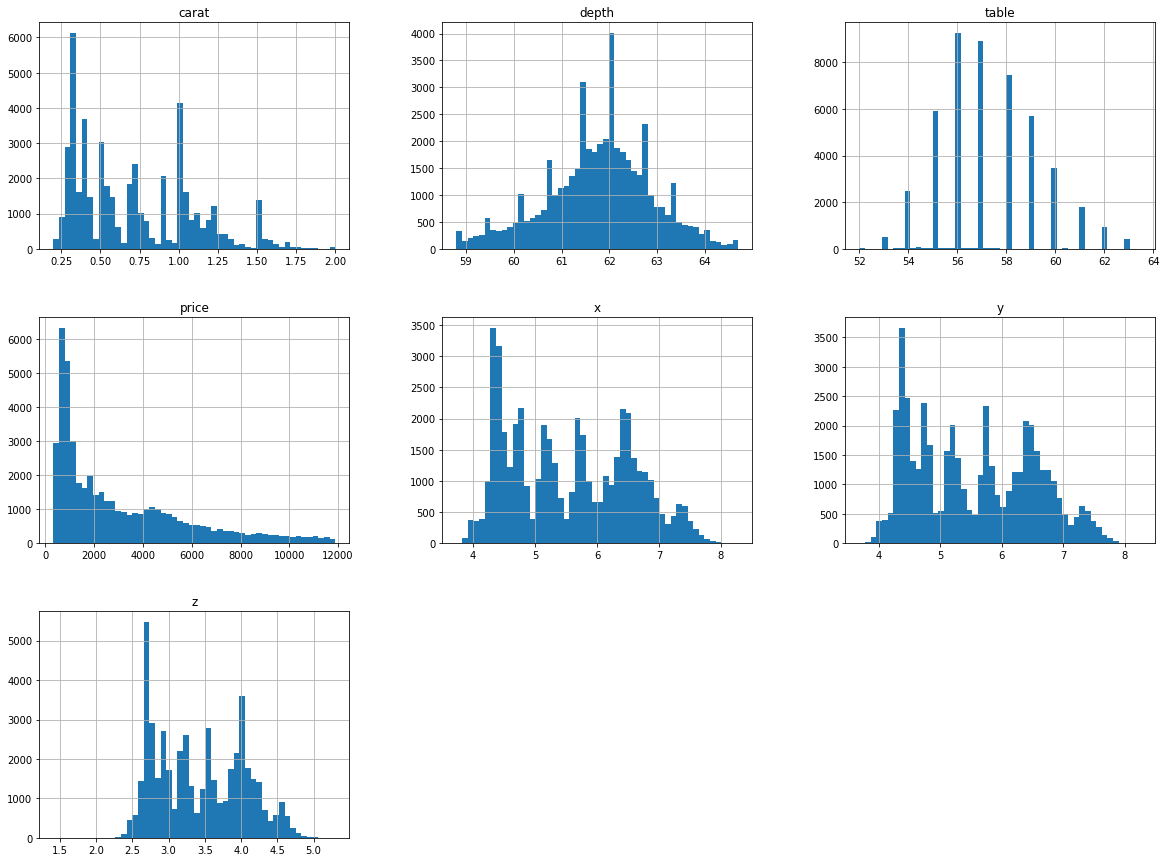

In [16]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

**Insight**


*   The increased price of Diamonds is proportional to a decrease in the number of samples. This can be seen clearly from the "Price" histogram whose graph has decreased along with the increasing number of samples (x-axis).
*   The price range of Diamonds is quite high, from the scale of hundreds of US dollars to around $ 11800.

*   More than half of the diamonds price is worth under $ 2500.
*   Right-Skewed price distribution. This will have implications for the model.

## Exploratory Data Analysis - Multivariate Analysis

### Categorical Features

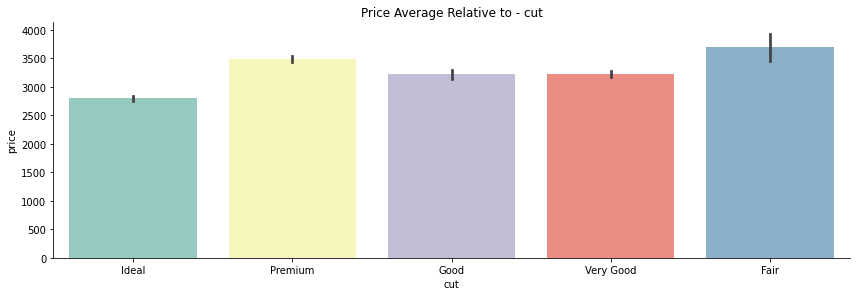

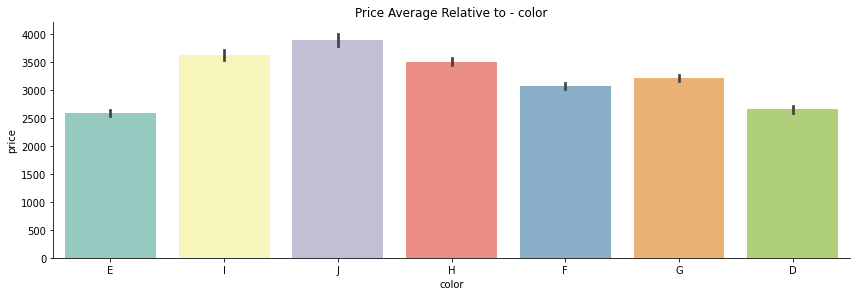

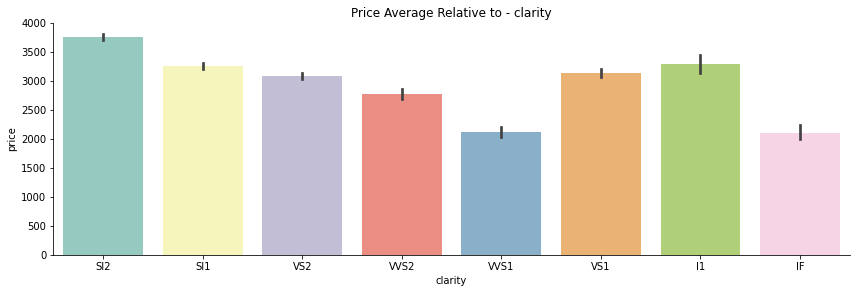

In [17]:
cat_features = diamonds.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
  plt.title("Price Average Relative to - {}".format(col))

**Insight**

*   There are 5 categories in the Cut feature: Ideal, Premium, Very Good, Good, and Fair. From the percentage data, we can conclude that more than 60% of the sample is a high-grade type diamond, which is the ideal and premium grade.
*  Based on the variable description, the color categories from the worst to the best is J, I, H, G, F, E, and D. From the Color Graph, we can conclude that most of the grade is in the medium grade: G, F, H.

*   From the Clarity graph, we can conclude that most features are low grade: Si1, Si2, and VS2.




### Numerical Features

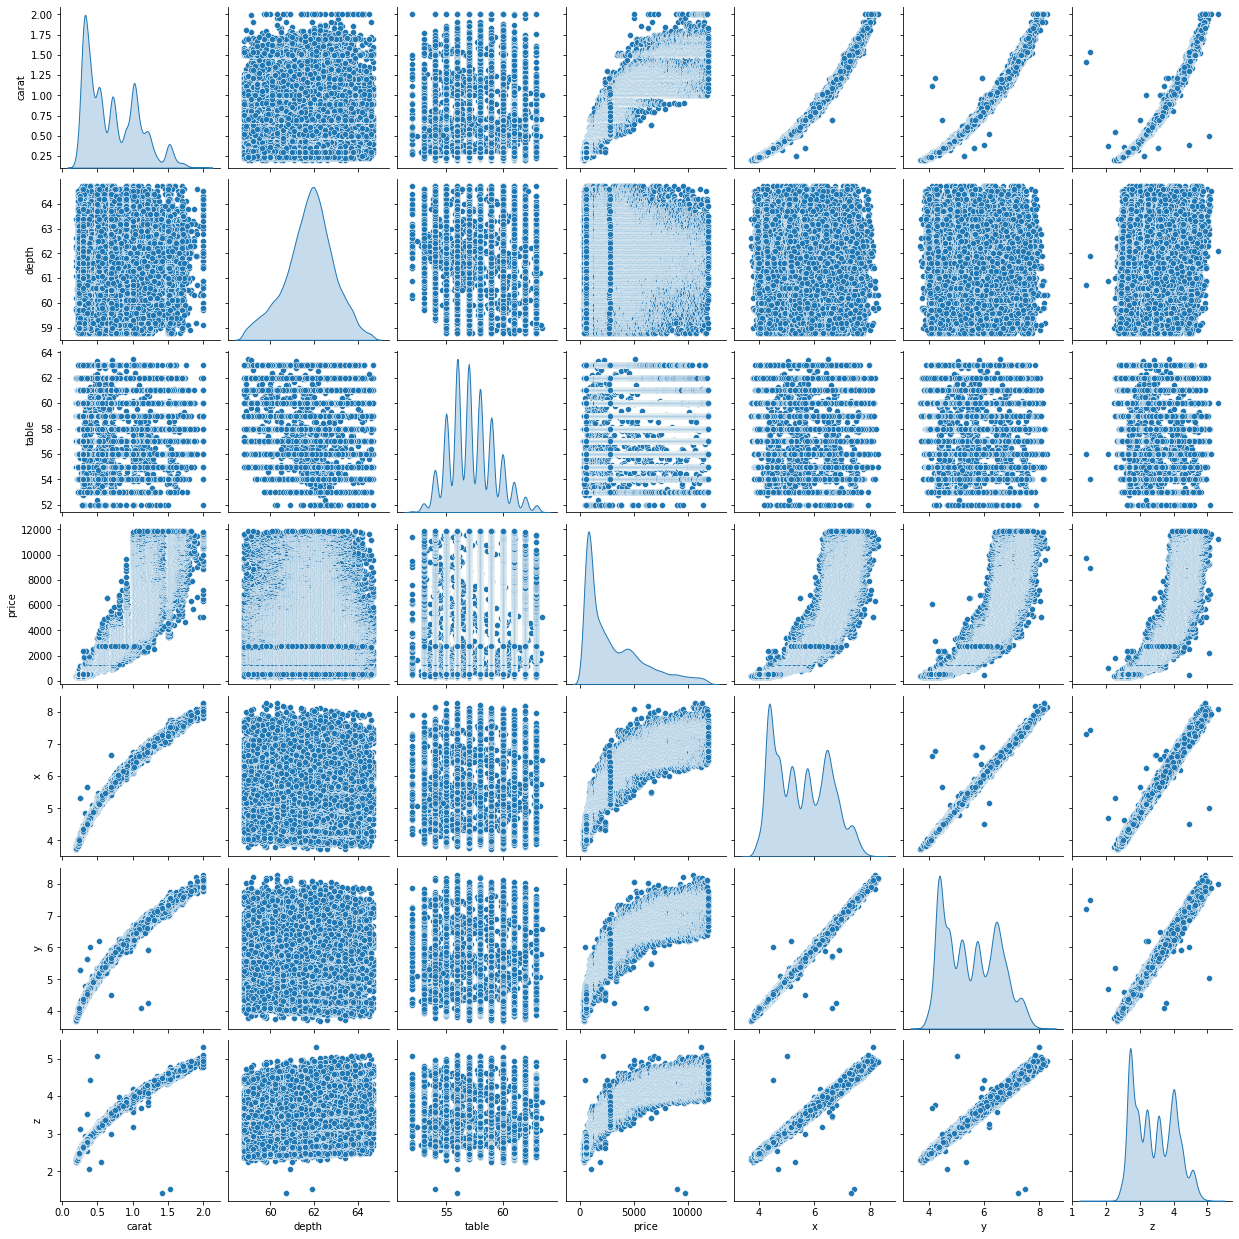

In [18]:
# Checking the relationship among all features with pairplot() 
sns.pairplot(diamonds, diag_kind = 'kde')

From the previous data distribution, we can see that 'carat', 'x', 'y', and 'z' have a high correlation with the "Price" feature. While the other two features,  'depth' and 'table', are seen as having a weak correlation because the distribution does not form a pattern. To evaluate the correlation score, use the CORR () function.

Text(0.5, 1.0, 'Correlation Matrix for Numerical Features ')

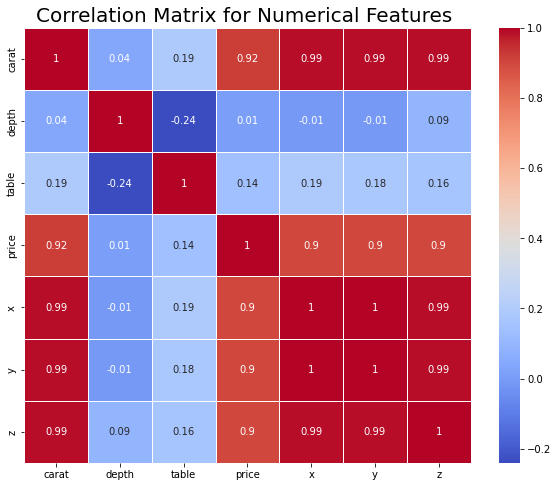

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix for Numerical Features ", size=20)

The correlation between two variables can be positive (the value of the two variables tends to increase together) or negative (the value of one variable tends to increase when the value of other variables decreases).

Well, back to the correlation graph above. If we observe, the features of 'Carat', 'X,' Y ', and' Z 'have a large correlation score (above 0.9) with the' Price 'target feature. That is, the 'Price' feature is highly correlated with all four features. Meanwhile, the 'depth' feature has a very small correlation (0.01). So, this feature can be dropped.

In [20]:
diamonds.drop(['depth'], inplace=True, axis=1)
diamonds.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


#Data Preparation

## Encoding Categorical Features

To encode categorical features, one of the standard techniques is the one-hot-encoding. The Scikit-Learn library provides this function to get the appropriate new features to represent the category variable. We have three categorical variables in our data: cut', 'color', and 'clarity. Let's do this encoding process with the get_dummies feature.

In [21]:
from sklearn.preprocessing import  OneHotEncoder
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds.head()

,carat,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


## Dimentionality Reduction with PCA

The dimensional reduction technique is a procedure that reduces the number of features while maintaining information on data. If we check using the pair plot function, the three features of the diamond size in the 'x' column, 'y', and 'z' have a high correlation. This is because these three features have the same information: the size of the Diamonds.

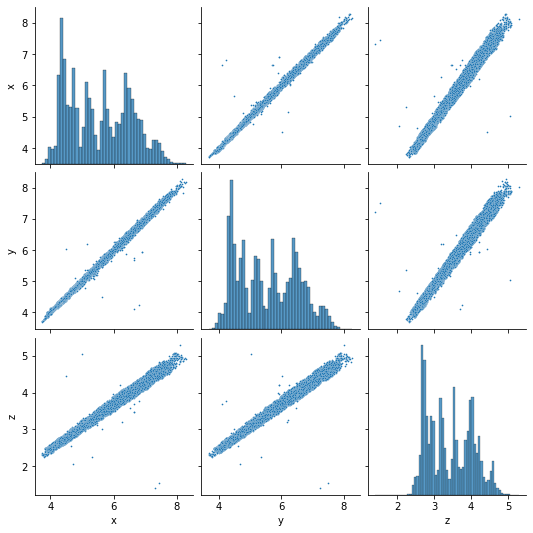

In [22]:
sns.pairplot(diamonds[['x','y','z']], plot_kws={"s": 3});

In [23]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['x','y','z']])
princ_comp = pca.transform(diamonds[['x','y','z']])

In [24]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

Based on these results, we will reduce the features (dimensions) and only maintain the first PC (component). This first PC will be a dimensional feature or diamond size replacing the other three features ('x', 'y', 'z'). We name this feature 'Dimension'.

Now we will create a new feature called 'Dimension' to replace the features' x ',' y ', and 'z'. Here is the steps: 


*   Use N_Component = 1, because this time, the number of our components is only one.
*   Fit model with input data.

*   Add a new feature to the dataset with the name 'Dimension' and carry out the transformation process.
*   Drop column 'x', 'y', and 'z'.





In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)
diamonds.head()

,carat,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-2.452585
1,0.21,61.0,326,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,-2.630066
3,0.29,58.0,334,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,-2.048530
4,0.31,58.0,335,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,-1.831975
5,0.24,57.0,336,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,-2.451982


## Train-test-split

Let's do a train test split

In [26]:
from sklearn.model_selection import train_test_split
 
X = diamonds.drop(["price"],axis =1)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [27]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 42771
Total # of sample in test dataset: 4753


## Standarization

In [28]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


In [29]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


# Model Development

We will use two models (KNN and Random Forest) to predict the diamond prices.

In [30]:
# Create a dataframe to analyze model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest'])

## Model Development with KNN

In [31]:
from sklearn.neighbors import KNeighborsRegressor
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

## Model Develompment with Random Forest



In [32]:
# Import library needed
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

# Model Evaluation

In [33]:
## Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [34]:
# Let's find out the MSE value
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF'])
model_dict = {'KNN': knn, 'RF': RF}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,226.029595,257.399127
RF,59.264645,147.796052


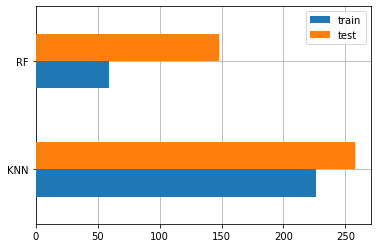

In [35]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

# Model Prediction

In [36]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediction_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediction_KNN,prediction_RF
35096,886,923.2,883.5
